## 1- Import necessary Labraries

In [100]:
# Data wrangling
import numpy as np      # vectors and matrices || Linear Algebra
import pandas as pd     # tables and data manipulations

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To have graphs embedded in the notebook
%matplotlib inline

# Models Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor


## 2- Load Data

In [101]:
df = pd.read_csv('./train.csv')

## 3- Data Exploration

In [102]:
print('------------ Dataset Shape -------------')
print('\n This dataset has "{0}" rows and "{1}" columns'.format(df.shape[0],df.shape[1]))
print('\n The Columns in this Dataset are')
list(df.columns.values)

------------ Dataset Shape -------------

 This dataset has "1460" rows and "81" columns

 The Columns in this Dataset are


['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [103]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


###  1) Missing Values

In [104]:
df_info=pd.DataFrame(df.dtypes).T.rename(index={0:'Type'})
df_info=df_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'nb null values'}))
df_info=df_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0:'% null values'}))
display(df_info)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Type,int64,int64,object,float64,int64,object,object,object,object,object,...,int64,object,object,object,int64,int64,int64,object,object,int64
nb null values,0,0,0,259,0,0,1369,0,0,0,...,0,1453,1179,1406,0,0,0,0,0,0
% null values,0.0,0.0,0.0,17.739726,0.0,0.0,93.767123,0.0,0.0,0.0,...,0.0,99.520548,80.753425,96.30137,0.0,0.0,0.0,0.0,0.0,0.0


* According to this table,we have some missing values for LotFrontage , Alley , PoolQC , Fence , MiscFeatures ,... and other features.
### 2) Deplicate Observations

In [105]:
print('Duplicated observations: {}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)

Duplicated observations: 0


### 3) Remove unecessary columns

In [106]:
df.drop(columns=['Id','MSZoning',  'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle',  'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl',  'Exterior2nd', 'MasVnrType','MasVnrArea',
        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'CentralAir',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageYrBlt', 'GarageFinish', 'GarageCars',  'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'PoolQC','PoolArea',  'ScreenPorch', 
       'Fence',  'MiscFeature', 'YrSold',  'SaleType','MiscVal','3SsnPorch', 'EnclosedPorch','GarageType','Heating',
       'SaleCondition'], inplace = True)
df.shape

(1460, 12)

In [107]:
X = df.columns.tolist()[:10]
y = df.columns.tolist()[-1:]
print(f'All columns: {df.columns.tolist()}')
print()
print(f'X values: {X}')
print()
print(f'y values: {y}')

All columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual', 'OverallCond', 'Exterior1st', 'TotalBsmtSF', 'KitchenQual', 'GarageArea', 'MoSold', 'SalePrice']

X values: ['MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual', 'OverallCond', 'Exterior1st', 'TotalBsmtSF', 'KitchenQual', 'GarageArea']

y values: ['SalePrice']


### 4) Check Variables

#### 4.1- Describe the numerical variables of the dataset

In [108]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
GarageArea,1460.0,472.980137,213.804841,0.0,334.50,480.0,576.00,1418.0
MoSold,1460.0,6.321918,2.703626,1.0,5.00,6.0,8.00,12.0
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.00,163000.0,214000.00,755000.0


MSSubClass        discrete numeric
LotFrontage       continuos numeric
LotArea           continuos numeric
OverallQual       discrete numeric
OverallCond       discrete numeric
TotalBsmtSF       continuous numeric
GarageArea        continuous numeric
MoSold            discrete numeric
SalePrice         discrete numeric

#### 4.2- Describe the categorical variables of the dataset

In [109]:
df.describe(include=[object]).T

,count,unique,top,freq
Neighborhood,1460,25,NAmes,225
Exterior1st,1460,15,VinylSd,515
KitchenQual,1460,4,TA,735


In [110]:
other_variables=[ "MSSubClass", "Neighborhood", "OverallQual", "OverallCond", "Exterior1st", "KitchenQual", "MoSold" ,"SalePrice"]
continuous_variables = [x for x in df.columns if x not in other_variables]
categorical_variables=["Neighborhood","KitchenQual", "Exterior1st"]
discrete_variables= [x for x in df.columns if x not in continuous_variables and x not in categorical_variables]
# create list containing non-continuous variables based on the previous list
discrete_data=df[discrete_variables]
categorical_data=df[categorical_variables]
continuous_data = df[continuous_variables]
print(categorical_variables)


['Neighborhood', 'KitchenQual', 'Exterior1st']


#### 4.3- Encode categoraical data

In [111]:
df.head()

,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,Exterior1st,TotalBsmtSF,KitchenQual,GarageArea,MoSold,SalePrice
0,60,65.0,8450,CollgCr,7,5,VinylSd,856,Gd,548,2,208500
1,20,80.0,9600,Veenker,6,8,MetalSd,1262,TA,460,5,181500
2,60,68.0,11250,CollgCr,7,5,VinylSd,920,Gd,608,9,223500
3,70,60.0,9550,Crawfor,7,5,Wd Sdng,756,Gd,642,2,140000
4,60,84.0,14260,NoRidge,8,5,VinylSd,1145,Gd,836,12,250000


In [112]:
df = pd.get_dummies(df,columns = ["Neighborhood","KitchenQual", "Exterior1st"], drop_first=True)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,TotalBsmtSF,GarageArea,MoSold,SalePrice,Neighborhood_Blueste,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,65.0,8450,7,5,856,548,2,208500,0,...,0,0,0,0,0,0,0,1,0,0
1,20,80.0,9600,6,8,1262,460,5,181500,0,...,0,0,0,1,0,0,0,0,0,0
2,60,68.0,11250,7,5,920,608,9,223500,0,...,0,0,0,0,0,0,0,1,0,0
3,70,60.0,9550,7,5,756,642,2,140000,0,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,1145,836,12,250000,0,...,0,0,0,0,0,0,0,1,0,0



## 4. Data Visualisation

### 0) The distribution of culomns

C:\Users\khaoula\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\khaoula\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


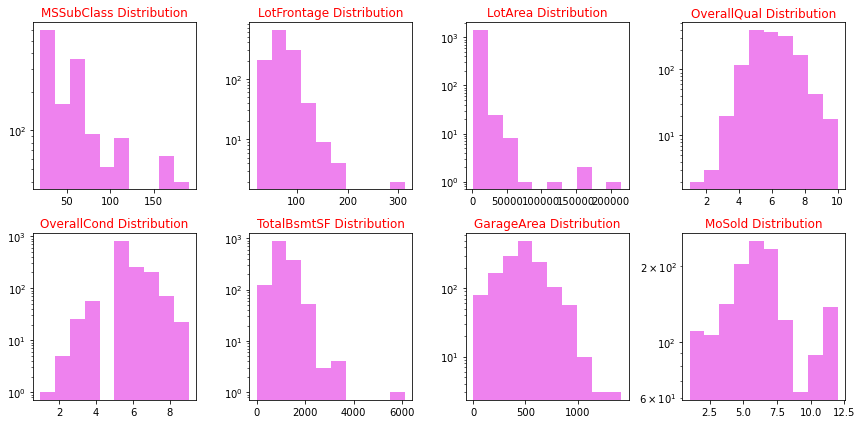

In [113]:
fig, axes = plt.subplots(2,4,figsize=(12,6))
columns = df.columns
for i, ax in enumerate(axes.flatten()):
    ax.hist(df[columns[i]], bins=10, color='violet')
    ax.set_title(str(columns[i])+' Distribution', color='red')
    ax.set_yscale('log')
plt.tight_layout()

* Visualizing the continuous data

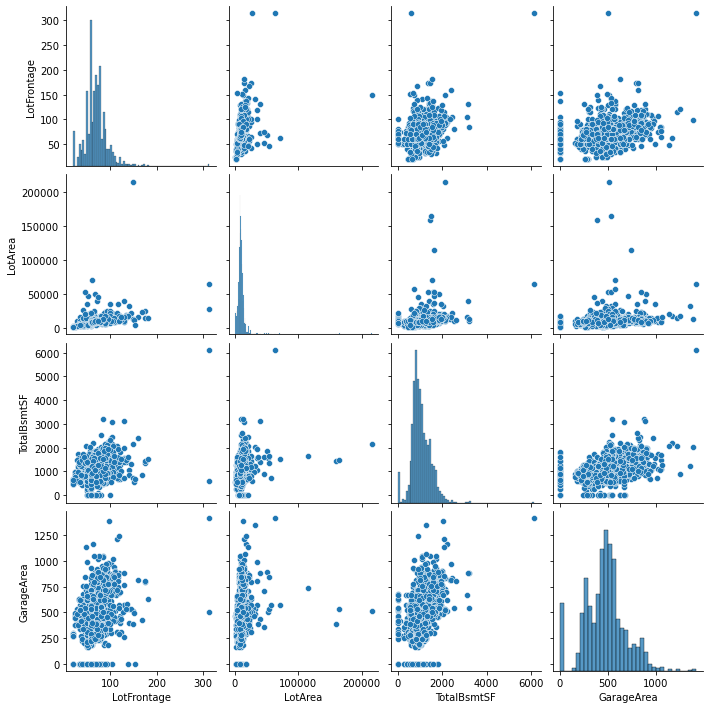

In [207]:
sns.pairplot(continuous_data)

array([[<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'GarageArea'}>]], dtype=object)

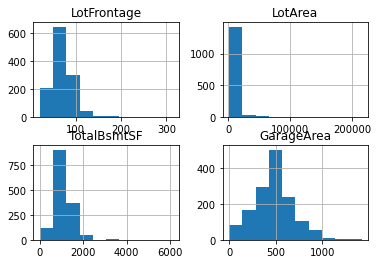

In [208]:
continuous_data.hist()

<AxesSubplot:>

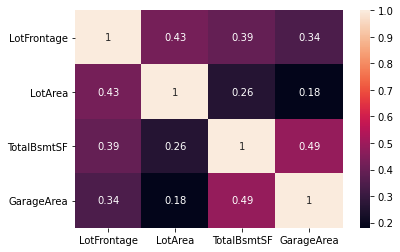

In [210]:
M = continuous_data.corr()
sns.heatmap(M, annot=True)

* Visualizing the discrete data

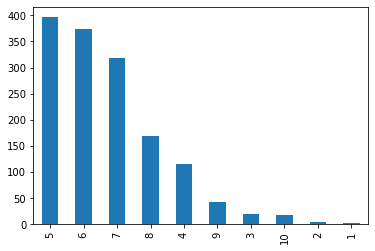

<AxesSubplot:>

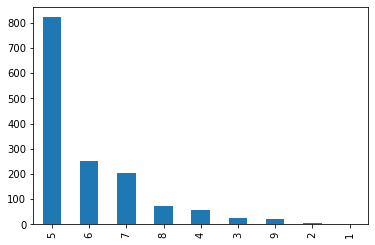

In [212]:
discrete_data.OverallQual.value_counts().plot.bar()
plt.show()
discrete_data.OverallCond.value_counts().plot.bar()

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

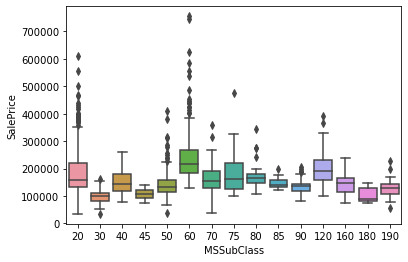

In [213]:
sns.boxplot(x=discrete_data.MSSubClass,y=df.SalePrice)

### 1) Visualize the target column

In [114]:
Statistics = df['SalePrice'].value_counts()
print(Statistics)

140000    20
135000    17
155000    14
145000    14
190000    13
          ..
337000     1
412500     1
306000     1
195400     1
206000     1
Name: SalePrice, Length: 663, dtype: int64


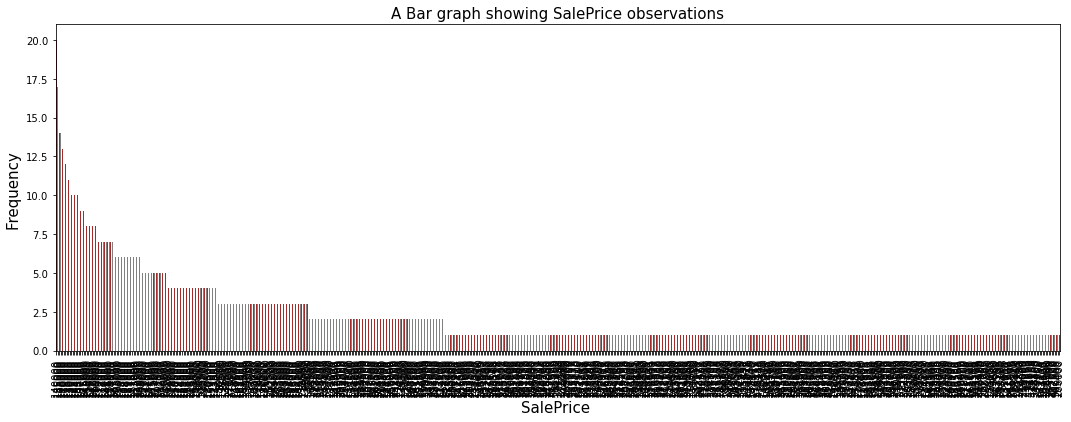

In [115]:
ax = Statistics.plot(kind='bar',figsize=(18,6), width=0.40 ,color=['brown','gray'])
ax.set_xlabel("SalePrice ",fontsize=15)      
ax.set_ylabel("Frequency ",fontsize=15)
ax.set_title( 'A Bar graph showing SalePrice observations' ,fontsize = 15)
plt.show()

### 2) Check the correlation

<AxesSubplot:>

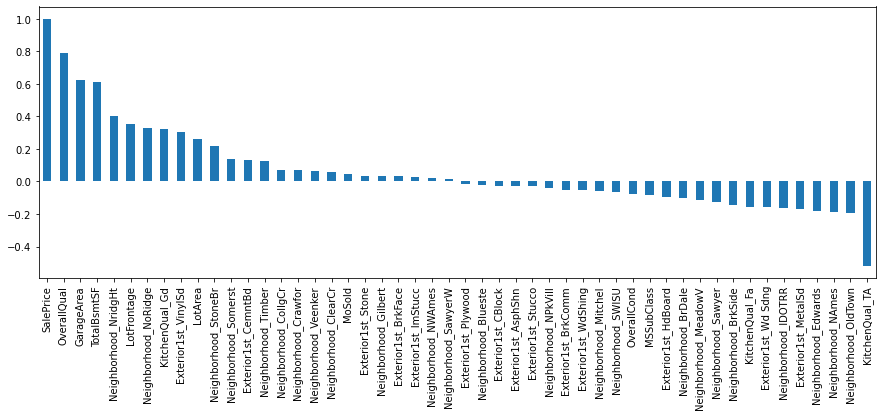

In [116]:
plt.figure(figsize=(15,5))
df.corr()['SalePrice'].sort_values(ascending = False).plot(kind='bar')

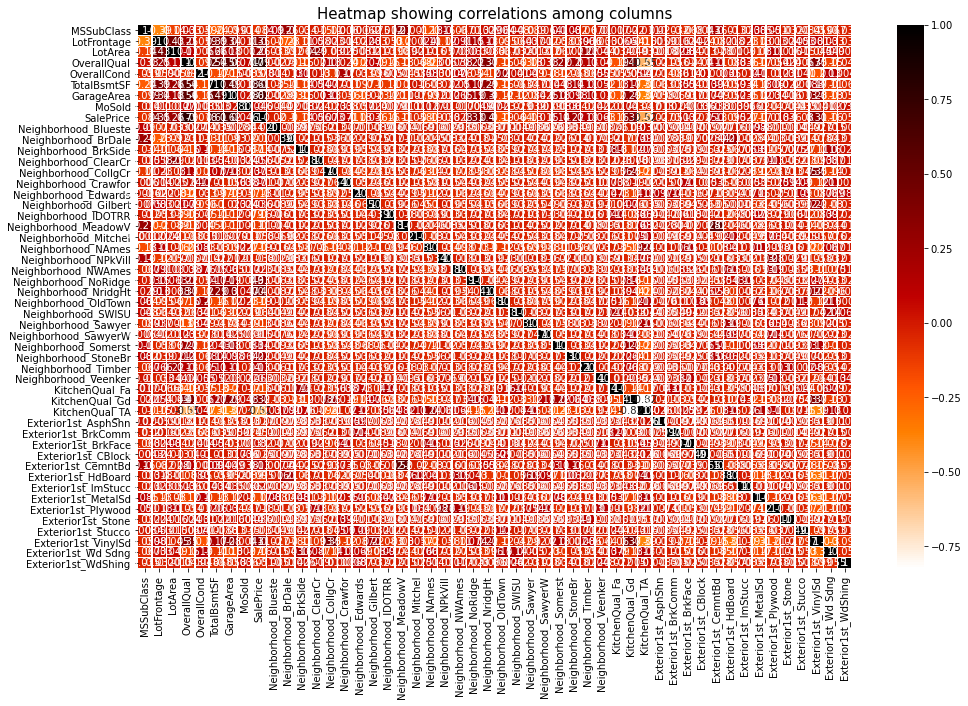

In [117]:
plt.figure(figsize=(16,10))  
sns.heatmap(df.corr(),annot=True,linewidths=.5, cmap="gist_heat_r")
plt.title('Heatmap showing correlations among columns',fontsize = 15)
plt.show()

* According to the graphs above, these attributes are the most correlated to our target
    * OverallQual,
    * GarageArea,
    * TotalBsmTSF
    * KitchenQualTA
 

### 3) Data distributed plots

In [118]:
num_0 = df[df.SalePrice >= 200000].shape[0]
num_1 = df[df.SalePrice <200000  ].shape[0]
num_2 = df[df.SalePrice <=150000 ].shape[0]

print( num_0 / (num_0 + num_1 + num_2) * 100 , "% houses sold with a price bigger than 200000.")
print( num_1 / (num_0 + num_1 + num_2) * 100 , "% houses sold with a price between 200000 and 150000.")
print( num_2 / (num_0 + num_1 + num_2) * 100 , "% houses sold with a price less than 150000.")

20.923520923520925 % houses sold with a price bigger than 200000.
49.3025493025493 % houses sold with a price between 200000 and 150000.
29.773929773929776 % houses sold with a price less than 150000.


## 5. Data Preparation

In [119]:
df = df.reset_index()

In [120]:
df_info=pd.DataFrame(df.dtypes).T.rename(index={0:'Type'})
df_info=df_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'nb null values'}))
df_info=df_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0:'% null values'}))
display(df_info)

,index,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,TotalBsmtSF,GarageArea,MoSold,SalePrice,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
Type,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,...,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8
nb null values,0,0,259,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
% null values,0.0,0.0,17.739726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
print (df.isnull().sum())

index                     0
MSSubClass                0
LotFrontage             259
LotArea                   0
OverallQual               0
OverallCond               0
TotalBsmtSF               0
GarageArea                0
MoSold                    0
SalePrice                 0
Neighborhood_Blueste      0
Neighborhood_BrDale       0
Neighborhood_BrkSide      0
Neighborhood_ClearCr      0
Neighborhood_CollgCr      0
Neighborhood_Crawfor      0
Neighborhood_Edwards      0
Neighborhood_Gilbert      0
Neighborhood_IDOTRR       0
Neighborhood_MeadowV      0
Neighborhood_Mitchel      0
Neighborhood_NAmes        0
Neighborhood_NPkVill      0
Neighborhood_NWAmes       0
Neighborhood_NoRidge      0
Neighborhood_NridgHt      0
Neighborhood_OldTown      0
Neighborhood_SWISU        0
Neighborhood_Sawyer       0
Neighborhood_SawyerW      0
Neighborhood_Somerst      0
Neighborhood_StoneBr      0
Neighborhood_Timber       0
Neighborhood_Veenker      0
KitchenQual_Fa            0
KitchenQual_Gd      

LotFrontage have some missing values that we are going to replace them with the median

In [122]:
median = df['LotFrontage'].median()
df['LotFrontage'].fillna(median, inplace=True)

In [123]:
print (df.isnull().sum())

index                   0
MSSubClass              0
LotFrontage             0
LotArea                 0
OverallQual             0
OverallCond             0
TotalBsmtSF             0
GarageArea              0
MoSold                  0
SalePrice               0
Neighborhood_Blueste    0
Neighborhood_BrDale     0
Neighborhood_BrkSide    0
Neighborhood_ClearCr    0
Neighborhood_CollgCr    0
Neighborhood_Crawfor    0
Neighborhood_Edwards    0
Neighborhood_Gilbert    0
Neighborhood_IDOTRR     0
Neighborhood_MeadowV    0
Neighborhood_Mitchel    0
Neighborhood_NAmes      0
Neighborhood_NPkVill    0
Neighborhood_NWAmes     0
Neighborhood_NoRidge    0
Neighborhood_NridgHt    0
Neighborhood_OldTown    0
Neighborhood_SWISU      0
Neighborhood_Sawyer     0
Neighborhood_SawyerW    0
Neighborhood_Somerst    0
Neighborhood_StoneBr    0
Neighborhood_Timber     0
Neighborhood_Veenker    0
KitchenQual_Fa          0
KitchenQual_Gd          0
KitchenQual_TA          0
Exterior1st_AsphShn     0
Exterior1st_

In [169]:
np.any(np.isfinite(df))

True

We also have some infinite values so we are going to replace them with NaN and then replace them with the mean

In [170]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.mean())

,index,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,TotalBsmtSF,GarageArea,MoSold,SalePrice,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0,60,65.0,8450,7,5,856,548,2,208500,...,0,0,0,0,0,0,0,1,0,0
1,1,20,80.0,9600,6,8,1262,460,5,181500,...,0,0,0,1,0,0,0,0,0,0
2,2,60,68.0,11250,7,5,920,608,9,223500,...,0,0,0,0,0,0,0,1,0,0
3,3,70,60.0,9550,7,5,756,642,2,140000,...,0,0,0,0,0,0,0,0,1,0
4,4,60,84.0,14260,8,5,1145,836,12,250000,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,60,62.0,7917,6,5,953,460,8,175000,...,0,0,0,0,0,0,0,1,0,0
1456,1456,20,85.0,13175,6,6,1542,500,2,210000,...,0,0,0,0,1,0,0,0,0,0
1457,1457,70,66.0,9042,7,9,1152,252,5,266500,...,1,0,0,0,0,0,0,0,0,0
1458,1458,20,68.0,9717,5,6,1078,240,4,142125,...,0,0,0,1,0,0,0,0,0,0


In [171]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [173]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

## 6. Modeling

# Linear Regression

In [174]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [175]:
print(lin_reg.score(X_test, y_test))

0.8042787088221227


In [179]:
y_predict = lin_reg.predict(X_test)
y_predict[20]

137934.25563877396

# Support Vector Regressor

In [180]:
c=SVR(kernel='linear')
c.fit(X_train,y_train)

SVR(kernel='linear')

In [181]:
print(lin_reg.score(X_test, y_test))

0.8042787088221227


In [183]:
y_predict = c.predict(X_test)
y_predict[20]

163027.20698102828

# K Nearest Neighbor Regressor without GridSearchCV

In [192]:
from sklearn import neighbors
model = neighbors.KNeighborsRegressor(n_neighbors = 7)
model.fit(X_train, y_train)     

KNeighborsRegressor(n_neighbors=7)

In [193]:
print(model.score(X_test, y_test))

0.7372090420860706


In [194]:
predict = model.predict(X_test)
predict[20]

135057.14285714287

# K Nearest Neighbor Regressor with GridSearchCV

In [195]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 5}

In [196]:
model = neighbors.KNeighborsRegressor(n_neighbors = 5)
model.fit(X_train, y_train)     

KNeighborsRegressor()

In [197]:
print(model.score(X_test, y_test))

0.719445940611277


In [198]:
predict = model.predict(X_test)
predict[20]

145280.0

# Random Forests Regressor

In [204]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train) 

RandomForestRegressor(random_state=0)

In [206]:
print(model.score(X_test, y_test))

0.719445940611277


In [205]:
predict = model.predict(X_test)
predict[20]

145280.0